# Preparations and training

In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [338]:
wine = load_wine()
x = wine.data
y = wine.target


In [339]:
models = (
    {'model': RandomForestClassifier()},
    {'model': GradientBoostingClassifier()},
    {'model': LogisticRegression(max_iter=10000)},
    {'model': SVC(probability=True)},
)


In [340]:
for model in models:
    idx = np.random.choice(len(x), size=round(len(x)*0.6), replace=True) # bagging
    curr = model.get('model') 
    curr.fit(x[idx], y[idx])
    y_pred = curr.predict(x)
    model['accuracy'] = accuracy_score(y, y_pred)
    model['predictions'] = curr.predict_proba(x)
    print(f'model: {curr}, accuracy: {model.get("accuracy")}' )

model: RandomForestClassifier(), accuracy: 0.9662921348314607
model: GradientBoostingClassifier(), accuracy: 0.949438202247191
model: LogisticRegression(max_iter=10000), accuracy: 0.9719101123595506
model: SVC(probability=True), accuracy: 0.702247191011236


In [341]:
predictions = []
for model in models:
  predictions.append([model.get('accuracy') * i for i in model.get('predictions')])

# Soft voting 

In [342]:
accuracy_sum = sum(model['accuracy'] for model in models)

In [343]:
final = [[sum(elements)/accuracy_sum for elements in zip(*inner_lists)] for inner_lists in zip(*predictions)]
accuracy_score(y, np.argmax(final, axis=1))

0.9943820224719101

# Confidence Plots

In [344]:
def plot_confidence(proba, y, class_names):
    n_classes = len(class_names)
    
    for i in range(len(proba)):
        plot.figure(figsize=(8, 4))
        plot.bar(range(n_classes), proba[i], color='blue', alpha=0.6)
        plot.xticks(range(n_classes), class_names)
        plot.title(f'Probability for probe no. {i}\nTrue value: {class_names[y[i]]}')
        plot.xlabel('Class')
        plot.ylabel('Probability')
        plot.show()

In [345]:
class_names = wine.target_names

RandomForestClassifier()


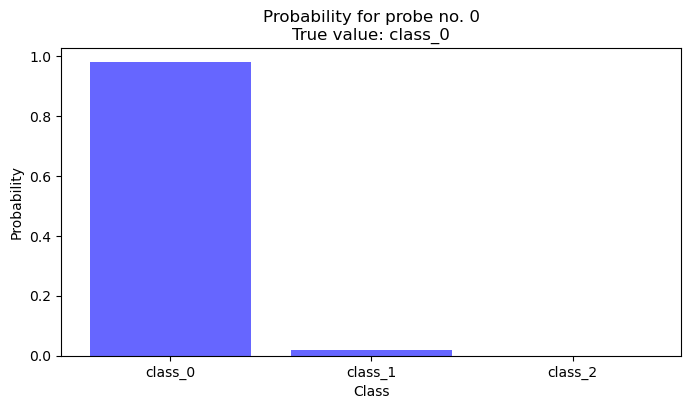

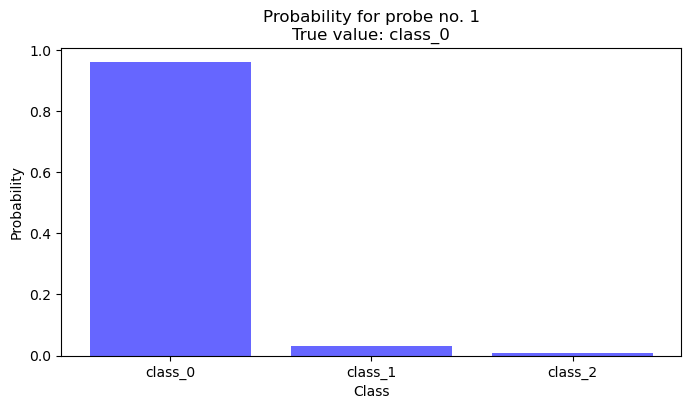

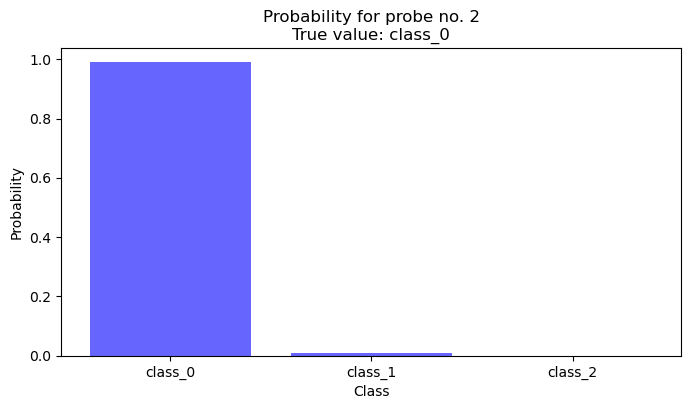

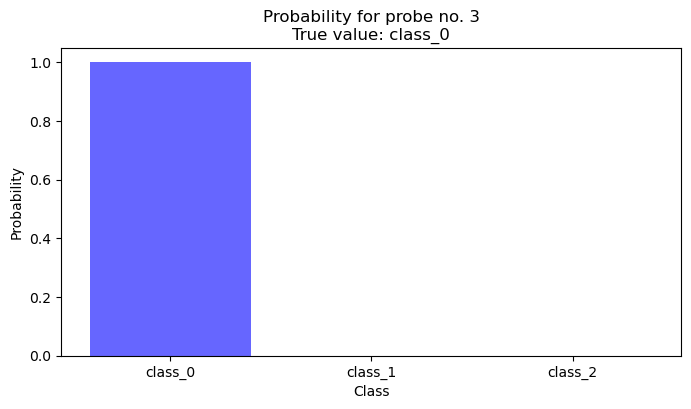

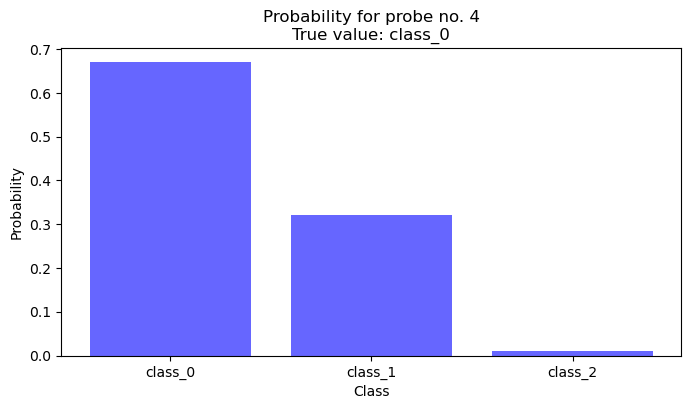

GradientBoostingClassifier()


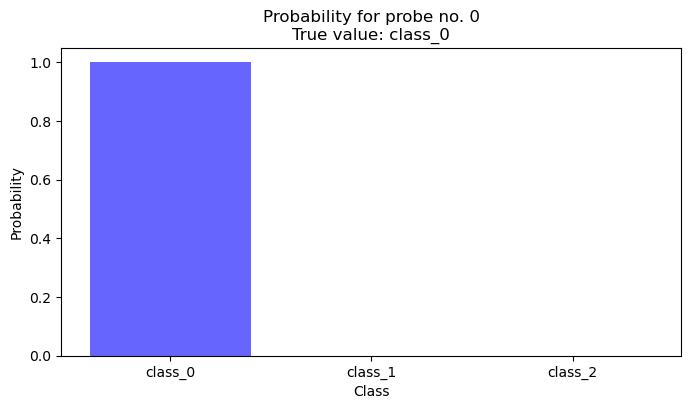

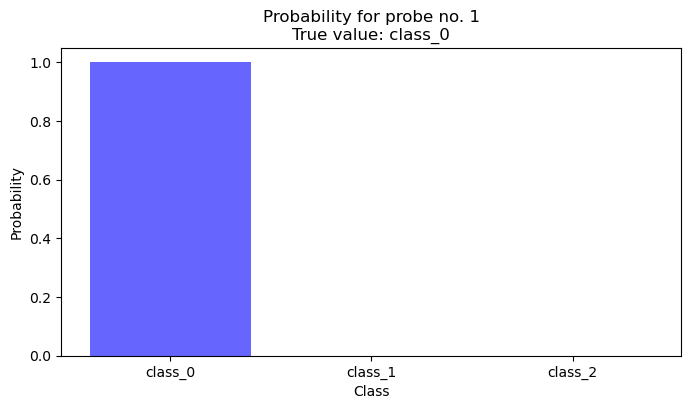

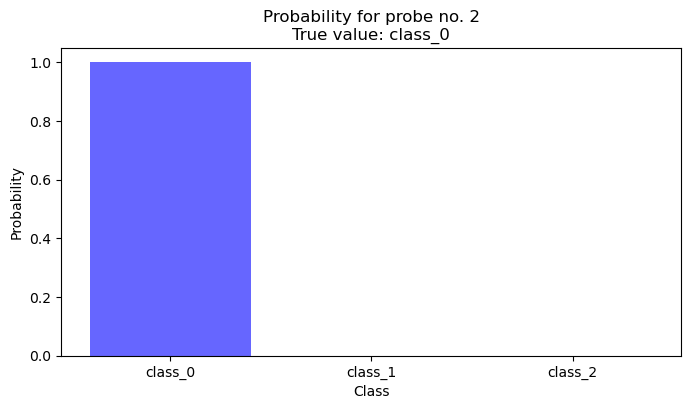

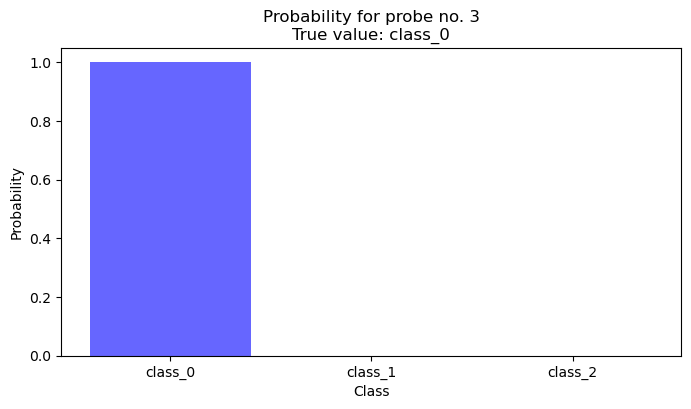

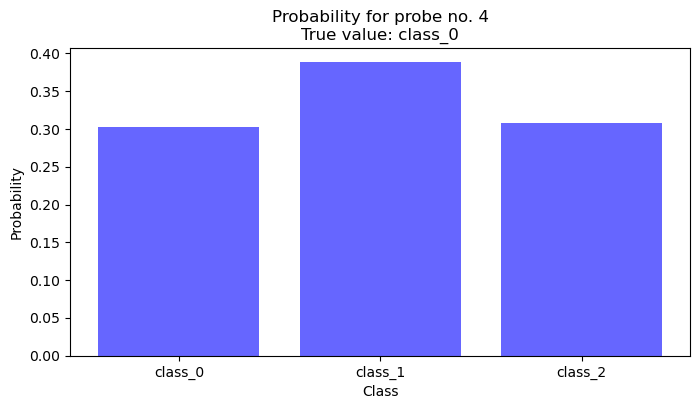

LogisticRegression(max_iter=10000)


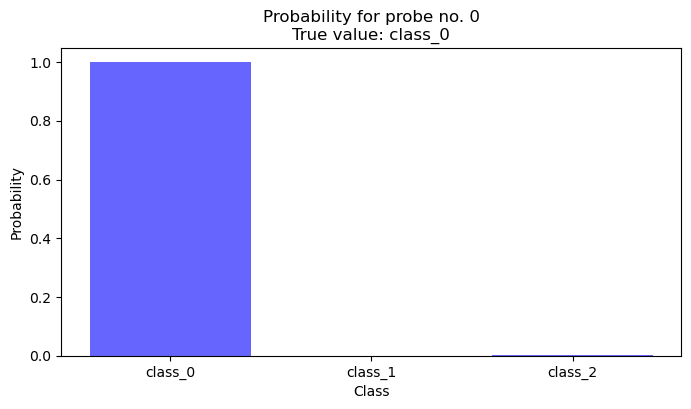

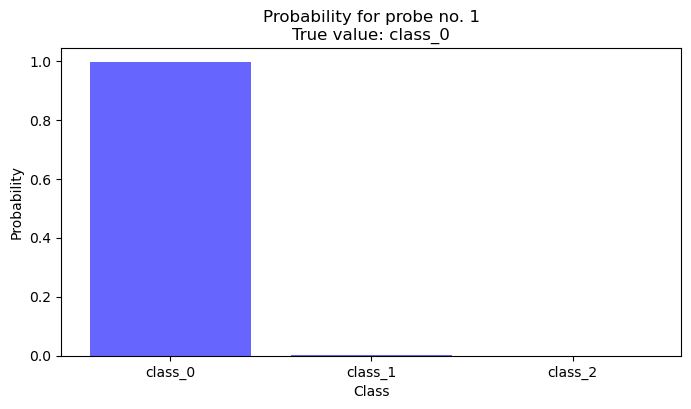

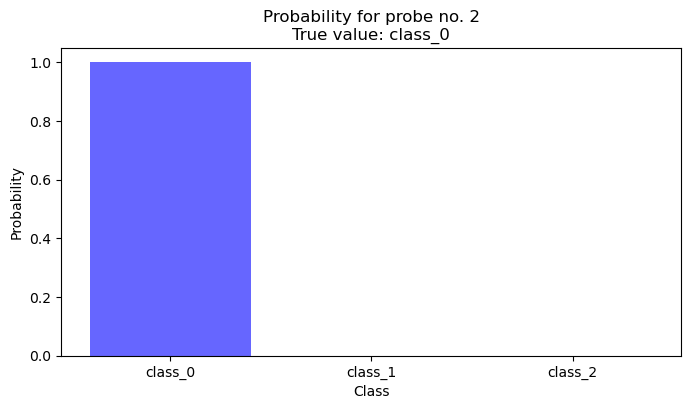

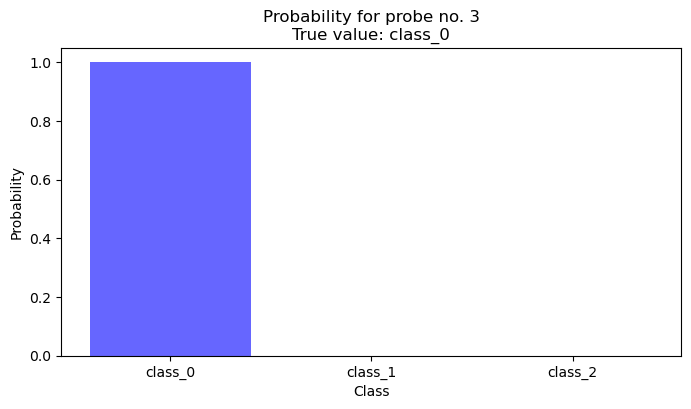

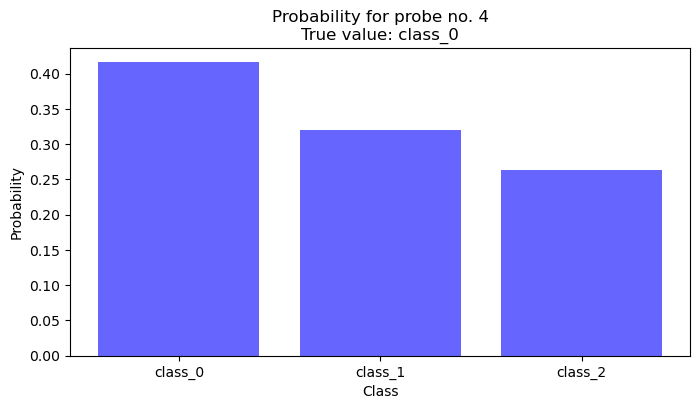

SVC(probability=True)


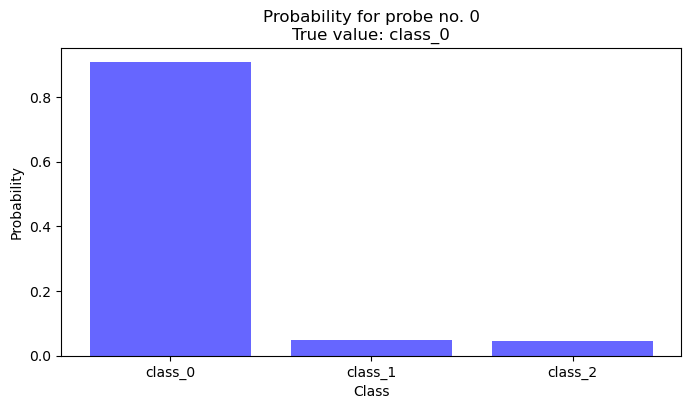

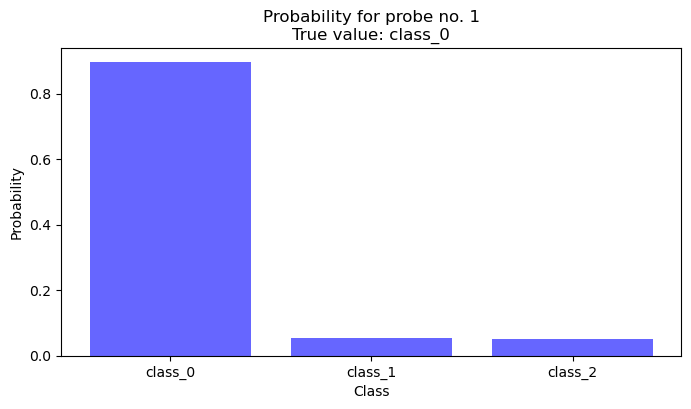

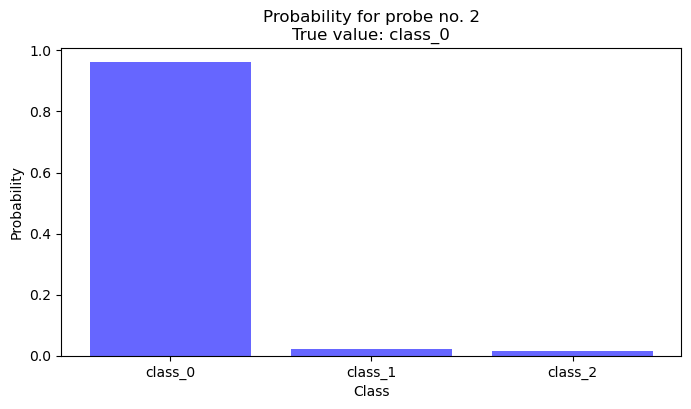

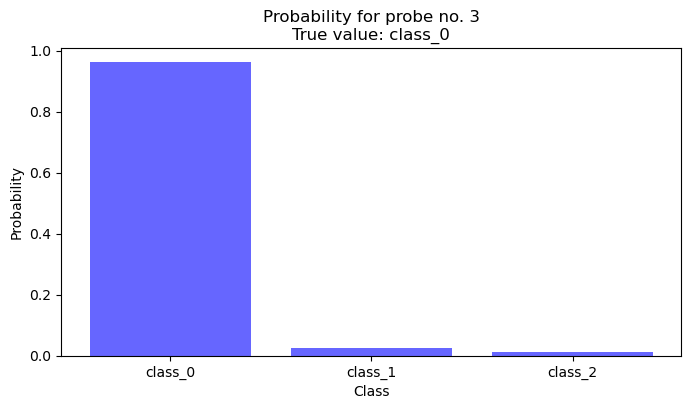

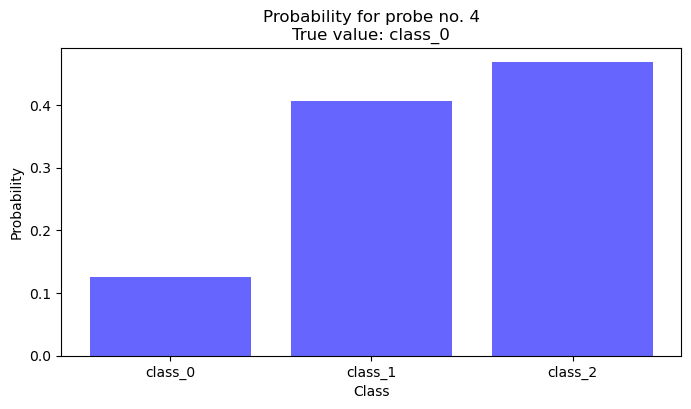

In [346]:
for model in models:
  print(model.get('model'))
  plot_confidence(model.get('predictions')[:5], y[:5], class_names)

final model


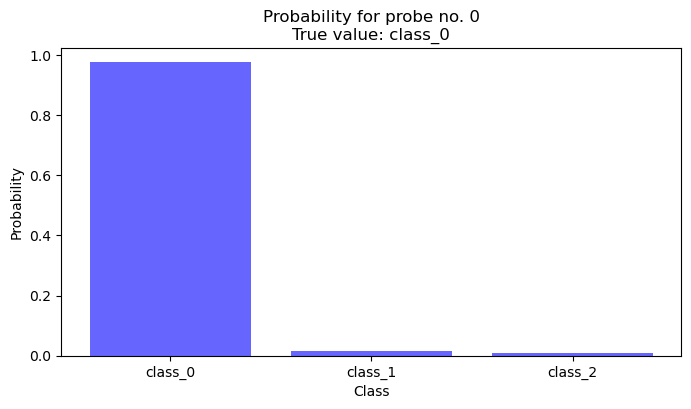

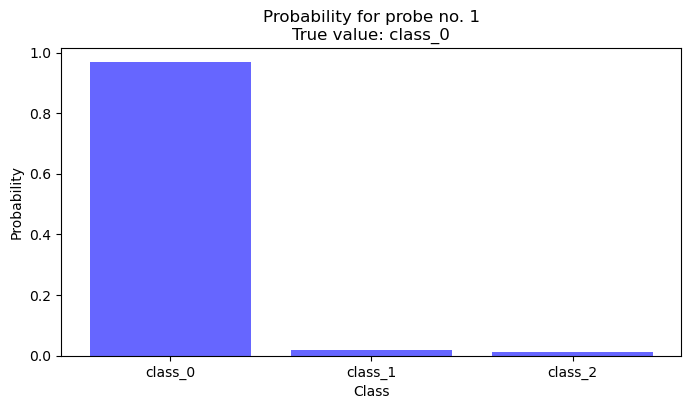

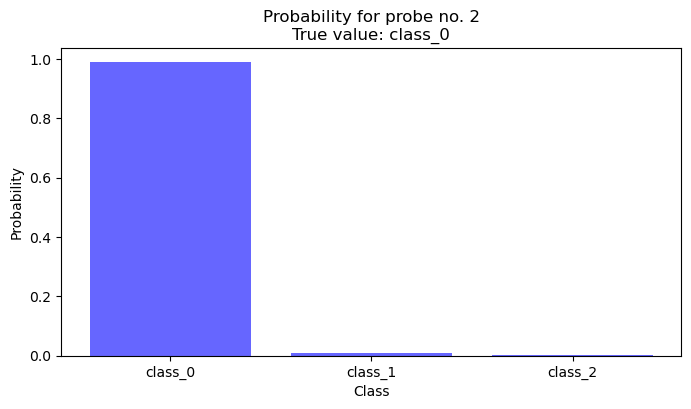

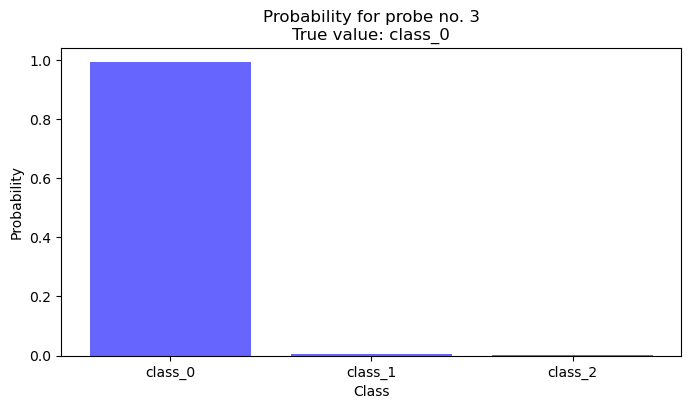

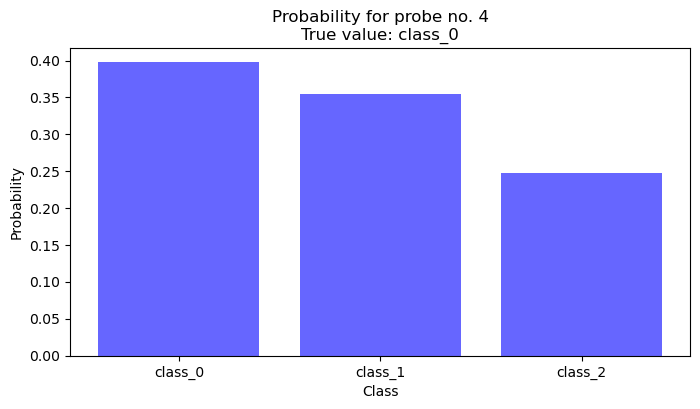

In [347]:
print('final model')
plot_confidence(final[:5], y[:5], class_names)